In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
list(range(1,3))

[1, 2]

### データ読み込み

In [3]:
file = './LD2011_2014.txt'

with open(file) as f:    
    l = f.read()
    s = l.replace('"','')
    l_split = s.split('\n')
    
print(type(l_split))
print(l_split[0:1])    

<class 'list'>
[';MT_001;MT_002;MT_003;MT_004;MT_005;MT_006;MT_007;MT_008;MT_009;MT_010;MT_011;MT_012;MT_013;MT_014;MT_015;MT_016;MT_017;MT_018;MT_019;MT_020;MT_021;MT_022;MT_023;MT_024;MT_025;MT_026;MT_027;MT_028;MT_029;MT_030;MT_031;MT_032;MT_033;MT_034;MT_035;MT_036;MT_037;MT_038;MT_039;MT_040;MT_041;MT_042;MT_043;MT_044;MT_045;MT_046;MT_047;MT_048;MT_049;MT_050;MT_051;MT_052;MT_053;MT_054;MT_055;MT_056;MT_057;MT_058;MT_059;MT_060;MT_061;MT_062;MT_063;MT_064;MT_065;MT_066;MT_067;MT_068;MT_069;MT_070;MT_071;MT_072;MT_073;MT_074;MT_075;MT_076;MT_077;MT_078;MT_079;MT_080;MT_081;MT_082;MT_083;MT_084;MT_085;MT_086;MT_087;MT_088;MT_089;MT_090;MT_091;MT_092;MT_093;MT_094;MT_095;MT_096;MT_097;MT_098;MT_099;MT_100;MT_101;MT_102;MT_103;MT_104;MT_105;MT_106;MT_107;MT_108;MT_109;MT_110;MT_111;MT_112;MT_113;MT_114;MT_115;MT_116;MT_117;MT_118;MT_119;MT_120;MT_121;MT_122;MT_123;MT_124;MT_125;MT_126;MT_127;MT_128;MT_129;MT_130;MT_131;MT_132;MT_133;MT_134;MT_135;MT_136;MT_137;MT_138;MT_139;MT_140;MT

In [4]:
#「;」区切りでリスト化
list_trans=[]
for a in l_split:
    b=a.split(';')
    list_trans.append(b)

In [5]:
# DataFrameにする
columns = list_trans[0]
columns[0]='time'
data_raw = list_trans[1:]

In [7]:
df =pd.DataFrame(data_raw,columns=columns)

In [8]:
df.head()

,time,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01 00:45:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01 01:15:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(140257, 371)

### datetime型に変換

In [10]:
df["time"] = pd.to_datetime(df["time"])

行数が多すぎるので2014年だけ取り出す

In [11]:
dataset_2014 = df[(df["time"]>="2014") & (df["time"] <"2015") ]

In [12]:
dataset_2014['time'].astype

<bound method NDFrame.astype of 105215   2014-01-01 00:00:00
105216   2014-01-01 00:15:00
105217   2014-01-01 00:30:00
105218   2014-01-01 00:45:00
105219   2014-01-01 01:00:00
                 ...        
140250   2014-12-31 22:45:00
140251   2014-12-31 23:00:00
140252   2014-12-31 23:15:00
140253   2014-12-31 23:30:00
140254   2014-12-31 23:45:00
Name: time, Length: 35040, dtype: datetime64[ns]>

まだ多いので1時間置きにする

In [13]:
dataset = dataset_2014[dataset_2014.index%4==3]
dataset

,time,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
105215,2014-01-01 00:00:00,"2,53807106598985","24,8933143669986","1,73761946133797","152,439024390244","76,8292682926829","291,666666666667","7,3487846240814","252,525252525253","54,1958041958042",...,"104,925053533191",15500,"1405,06329113924","1204,54545454545","15,645371577575","7,02165008777063","246,707638279192","46,7445742904841","712,609970674487","6918,91891891892"
105219,2014-01-01 01:00:00,"2,53807106598985","23,4708392603129",0,"136,178861788618","74,390243902439","252,97619047619","6,21820237422272","249,158249158249","52,4475524475525",...,"72,0913633119201",14900,"746,835443037975","909,090909090909","18,2529335071708","12,8730251609128","232,660228270413","50,0834724540901","695,74780058651","7243,24324324324"
105223,2014-01-01 02:00:00,"2,53807106598985","25,6045519203414",0,"148,373983739837","73,1707317073171","211,309523809524","5,08762012436405","242,424242424242","52,4475524475525",...,"68,5224839400428",15300,"582,278481012658","909,090909090909","16,9491525423729","13,458162668227","215,978928884987","51,7529215358932","649,560117302053","6594,5945945946"
105227,2014-01-01 03:00:00,"2,53807106598985","22,0483641536273",0,"119,918699186992","67,0731707317073","196,428571428571","6,21820237422272","218,855218855219","47,2027972027972",...,"68,5224839400428",14500,"578,059071729958","863,636363636364","16,9491525423729","9,94733762434172","182,616330114135","45,0751252086811","676,686217008798","6702,7027027027"
105231,2014-01-01 04:00:00,"2,53807106598985","22,0483641536273",0,"117,886178861789","54,8780487804878","166,666666666667","5,65291124929339","202,020202020202","45,4545454545455",...,"68,5224839400428",13500,"565,400843881857","863,636363636364","16,9491525423729","8,19192510239906","178,226514486392","46,7445742904841","673,020527859238","6486,48648648649"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140235,2014-12-31 19:00:00,"2,53807106598985","29,1607396870555","1,73761946133797","215,447154471545","92,6829268292683","422,619047619048","12,4364047484454","370,37037037037","92,6573426573427",...,"425,410421127766",40800,"3016,8776371308","3068,18181818182","110,821382007823","4,09596255119953","510,974539069359","40,0667779632721","695,74780058651","9567,56756756757"
140239,2014-12-31 20:00:00,"1,26903553299492","26,3157894736842","1,73761946133797","195,121951219512","96,3414634146341","366,071428571429","11,3058224985868","340,06734006734","99,6503496503497",...,"339,757316202712",38000,"1877,63713080169","2227,27272727273","73,0117340286832","5,85137507314219","482,001755926251","41,7362270450751","689,882697947214","8594,5945945946"
140243,2014-12-31 21:00:00,"1,26903553299492","22,7596017069701","1,73761946133797","162,60162601626","87,8048780487805","327,380952380952","11,3058224985868","265,993265993266","83,9160839160839",...,"323,340471092077",37100,"1654,00843881857","1613,63636363636","71,7079530638853","4,68110005851375","336,259877085162","131,886477462437","659,090909090909","7837,83783783784"
140247,2014-12-31 22:00:00,"1,26903553299492","22,0483641536273","1,73761946133797","164,634146341463","93,9024390243902","315,47619047619","11,3058224985868","262,626262626263","71,6783216783217",...,"323,340471092077",37000,"1645,56962025316","1409,09090909091","66,4928292046936","6,43651258045641","521,510096575944","173,622704507513","658,357771260997","7891,89189189189"


#### 集計を行いやすいようにデータの持ち方を変換

In [14]:
data = pd.melt(dataset, id_vars=['time'], var_name="customer_id", value_name="power_usage")

In [15]:
data.head()

,time,customer_id,power_usage
0,2014-01-01 00:00:00,MT_001,"2,53807106598985"
1,2014-01-01 01:00:00,MT_001,"2,53807106598985"
2,2014-01-01 02:00:00,MT_001,"2,53807106598985"
3,2014-01-01 03:00:00,MT_001,"2,53807106598985"
4,2014-01-01 04:00:00,MT_001,"2,53807106598985"


In [16]:
data.shape

(3241200, 3)

power usageをintにする

In [17]:
data["power_usage"]=data["power_usage"].apply(lambda x: x.replace(',',''))

In [18]:
data["power_usage"]=data["power_usage"].astype("float").apply(lambda x: x/1000000000000)

In [19]:
data

,time,customer_id,power_usage
0,2014-01-01 00:00:00,MT_001,253.807107
1,2014-01-01 01:00:00,MT_001,253.807107
2,2014-01-01 02:00:00,MT_001,253.807107
3,2014-01-01 03:00:00,MT_001,253.807107
4,2014-01-01 04:00:00,MT_001,253.807107
...,...,...,...
3241195,2014-12-31 19:00:00,MT_370,956.756757
3241196,2014-12-31 20:00:00,MT_370,85.945946
3241197,2014-12-31 21:00:00,MT_370,783.783784
3241198,2014-12-31 22:00:00,MT_370,789.189189


### year,month,week,hourに変換する

In [20]:
data["month"] = data["time"].dt.month
data["week"] = data["time"].dt.strftime('%A')
data["hour"] = data["time"].dt.hour

In [21]:
data

,time,customer_id,power_usage,month,week,hour
0,2014-01-01 00:00:00,MT_001,253.807107,1,Wednesday,0
1,2014-01-01 01:00:00,MT_001,253.807107,1,Wednesday,1
2,2014-01-01 02:00:00,MT_001,253.807107,1,Wednesday,2
3,2014-01-01 03:00:00,MT_001,253.807107,1,Wednesday,3
4,2014-01-01 04:00:00,MT_001,253.807107,1,Wednesday,4
...,...,...,...,...,...,...
3241195,2014-12-31 19:00:00,MT_370,956.756757,12,Wednesday,19
3241196,2014-12-31 20:00:00,MT_370,85.945946,12,Wednesday,20
3241197,2014-12-31 21:00:00,MT_370,783.783784,12,Wednesday,21
3241198,2014-12-31 22:00:00,MT_370,789.189189,12,Wednesday,22


### 可視化する

### 顧客ごとにpower_usageを集計

In [22]:
total_power_usage_by_company = data.groupby(["customer_id"]).aggregate({"power_usage": np.sum}).reset_index()
total_power_usage_by_company.head()

,customer_id,power_usage
0,MT_001,1.434898e+06
1,MT_002,2.131735e+06
2,MT_003,1.804605e+06
3,MT_004,3.491362e+06
4,MT_005,3.956862e+06


### 顧客ごとの1年間の総消費電力量をプロット

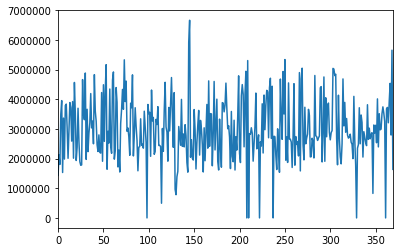

In [23]:
total_power_usage_by_company["power_usage"].plot(x="customer_id", y="power_usage")

### 時間別の消費電力量を集計する

In [24]:
hourly_total_value = data.groupby(["hour"]).aggregate({"power_usage": np.sum}).reset_index()
hourly_total_value

,hour,power_usage
0,0,4.882099e+07
1,1,4.874534e+07
2,2,4.832166e+07
3,3,4.851341e+07
4,4,4.880792e+07
5,5,4.833182e+07
6,6,4.848098e+07
7,7,4.628340e+07
8,8,4.575147e+07
9,9,4.520086e+07


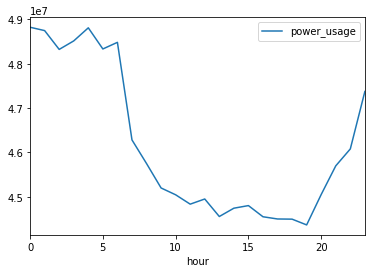

In [25]:
hourly_total_value.plot(x="hour", y="power_usage")

### 月別の消費電力量を集計する

In [26]:
monthly_total_value = data.groupby(["month"]).aggregate({"power_usage": np.sum}).reset_index()
monthly_total_value

,month,power_usage
0,1,9.118724e+07
1,2,8.439824e+07
2,3,9.563364e+07
3,4,9.260370e+07
4,5,9.539726e+07
5,6,9.072178e+07
6,7,9.352752e+07
7,8,9.303111e+07
8,9,9.056839e+07
9,10,9.402475e+07


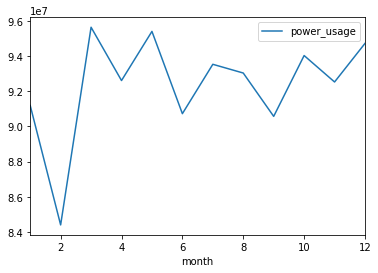

In [27]:
monthly_total_value.plot(x="month", y="power_usage")

### 週別の消費電力量を集計する

In [28]:
weekly_total_value = data.groupby(["week"]).aggregate({"power_usage": np.sum}).reset_index()
weekly_total_value 

,week,power_usage
0,Friday,1.579312e+08
1,Monday,1.578656e+08
2,Saturday,1.580246e+08
3,Sunday,1.578215e+08
4,Thursday,1.576453e+08
5,Tuesday,1.580858e+08
6,Wednesday,1.609579e+08


In [29]:
week_of_day =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_total_value['week']=weekly_total_value['week'].apply(lambda x: week_of_day.index(x) if x in week_of_day else -1)

In [30]:
weekly_total_value=weekly_total_value.sort_values('week')

In [31]:
weekly_total_value_plot =weekly_total_value.copy()
weekly_total_value_plot ['week']=week_of_day

In [32]:
weekly_total_value_plot

,week,power_usage
1,Monday,1.578656e+08
5,Tuesday,1.580858e+08
6,Wednesday,1.609579e+08
4,Thursday,1.576453e+08
0,Friday,1.579312e+08
2,Saturday,1.580246e+08
3,Sunday,1.578215e+08


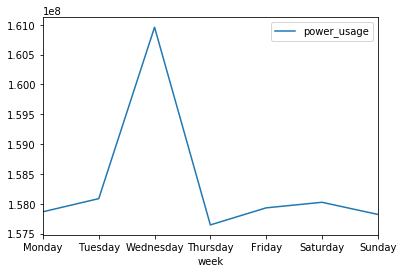

In [33]:
weekly_total_value_plot.plot(x="week", y="power_usage")

### 要素数カウント

In [34]:
data_non_zero = data[data["power_usage"] > 0]
monthly_total_count = data_non_zero.groupby(["month"])["customer_id"].nunique()

In [35]:
data_non_zero

,time,customer_id,power_usage,month,week,hour
0,2014-01-01 00:00:00,MT_001,253.807107,1,Wednesday,0
1,2014-01-01 01:00:00,MT_001,253.807107,1,Wednesday,1
2,2014-01-01 02:00:00,MT_001,253.807107,1,Wednesday,2
3,2014-01-01 03:00:00,MT_001,253.807107,1,Wednesday,3
4,2014-01-01 04:00:00,MT_001,253.807107,1,Wednesday,4
...,...,...,...,...,...,...
3241195,2014-12-31 19:00:00,MT_370,956.756757,12,Wednesday,19
3241196,2014-12-31 20:00:00,MT_370,85.945946,12,Wednesday,20
3241197,2014-12-31 21:00:00,MT_370,783.783784,12,Wednesday,21
3241198,2014-12-31 22:00:00,MT_370,789.189189,12,Wednesday,22


In [36]:
data_non_zero.shape

(3181272, 6)

In [37]:
monthly_total_count

month
1     361
2     366
3     368
4     368
5     368
6     368
7     369
8     369
9     369
10    368
11    369
12    369
Name: customer_id, dtype: int64

In [38]:
 data[data["power_usage"] == 0]

,time,customer_id,power_usage,month,week,hour
9,2014-01-01 09:00:00,MT_001,0.0,1,Wednesday,9
13,2014-01-01 13:00:00,MT_001,0.0,1,Wednesday,13
14,2014-01-01 14:00:00,MT_001,0.0,1,Wednesday,14
38,2014-01-02 14:00:00,MT_001,0.0,1,Thursday,14
39,2014-01-02 15:00:00,MT_001,0.0,1,Thursday,15
...,...,...,...,...,...,...
3233072,2014-01-27 08:00:00,MT_370,0.0,1,Monday,8
3234553,2014-03-30 01:00:00,MT_370,0.0,3,Sunday,1
3239602,2014-10-26 10:00:00,MT_370,0.0,10,Sunday,10
3239603,2014-10-26 11:00:00,MT_370,0.0,10,Sunday,11


In [39]:
 data[data["power_usage"] == 0].shape

(59928, 6)

# 1.月ごとでpivot

In [40]:
month_df = pd.pivot_table(data, columns="month",index="customer_id", values="power_usage", aggfunc=np.mean).reset_index()

In [41]:
month_df 

month,customer_id,1,2,3,4,5,6,7,8,9,10,11,12
0,MT_001,215.631993,203.253414,169.716446,167.452764,156.966391,126.739636,127.650647,122.876412,134.635857,148.349230,191.916949,203.130970
1,MT_002,267.140443,250.439232,211.820692,219.259720,227.164877,236.725541,294.125407,296.066971,270.799747,225.029253,211.186186,209.969944
2,MT_003,203.539699,209.445203,209.028148,205.376967,206.926189,206.704315,204.473903,207.276515,206.221643,207.510066,205.256299,200.620311
3,MT_004,295.642375,228.875399,338.771964,357.163505,485.043218,457.111845,423.903149,480.532061,513.820291,523.796606,430.256888,236.644375
4,MT_005,580.462726,603.926031,489.781176,416.305894,354.612510,335.157520,442.487870,371.382442,380.022019,402.404603,496.126355,556.642244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,470.984573,451.351215,472.660866,407.439861,472.102468,365.639100,488.256825,456.315867,429.267278,466.151840,477.872375,435.436997
366,MT_367,330.034292,499.512704,499.853944,534.115940,528.595601,544.373244,578.256606,568.255084,555.347698,553.912234,521.711796,504.978747
367,MT_368,322.406273,330.735576,333.493457,309.219347,330.920486,336.912099,313.576638,329.228127,304.230871,299.339446,319.878107,300.398424
368,MT_369,662.917041,674.155921,692.992976,664.464046,653.445432,620.390559,590.659062,554.894217,632.462995,647.244417,675.876487,681.753865


In [42]:
month_df.shape

(370, 13)

1月から12月の列を抽出する

In [43]:
month_df2 = month_df.iloc[:,1:13]
month_df2

month,1,2,3,4,5,6,7,8,9,10,11,12
0,215.631993,203.253414,169.716446,167.452764,156.966391,126.739636,127.650647,122.876412,134.635857,148.349230,191.916949,203.130970
1,267.140443,250.439232,211.820692,219.259720,227.164877,236.725541,294.125407,296.066971,270.799747,225.029253,211.186186,209.969944
2,203.539699,209.445203,209.028148,205.376967,206.926189,206.704315,204.473903,207.276515,206.221643,207.510066,205.256299,200.620311
3,295.642375,228.875399,338.771964,357.163505,485.043218,457.111845,423.903149,480.532061,513.820291,523.796606,430.256888,236.644375
4,580.462726,603.926031,489.781176,416.305894,354.612510,335.157520,442.487870,371.382442,380.022019,402.404603,496.126355,556.642244
...,...,...,...,...,...,...,...,...,...,...,...,...
365,470.984573,451.351215,472.660866,407.439861,472.102468,365.639100,488.256825,456.315867,429.267278,466.151840,477.872375,435.436997
366,330.034292,499.512704,499.853944,534.115940,528.595601,544.373244,578.256606,568.255084,555.347698,553.912234,521.711796,504.978747
367,322.406273,330.735576,333.493457,309.219347,330.920486,336.912099,313.576638,329.228127,304.230871,299.339446,319.878107,300.398424
368,662.917041,674.155921,692.992976,664.464046,653.445432,620.390559,590.659062,554.894217,632.462995,647.244417,675.876487,681.753865


### 横軸に「月」、縦軸に月ごとの消費電力量の平均の折れ線グラフ

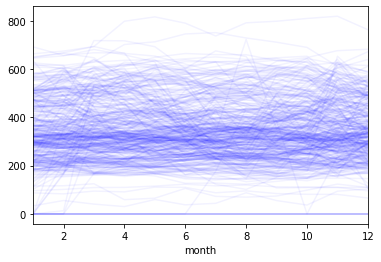

In [82]:
month_df2.T.plot(color='blue', alpha=0.05, legend=False)

### StandardScalerで平均0、標準偏差1で標準化する

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
month_df2_std = scaler.fit_transform(month_df2.T)
month_df2_std

array([[ 1.62384968,  0.78381471, -1.07396864, ...,  0.24856428,
         0.43768944,  1.62450902],
       [ 1.23433612,  0.23447444,  1.47120223, ...,  0.89326356,
         0.72740918, -1.22003359],
       [ 0.17903695, -1.0357759 ,  1.29145853, ...,  1.10672724,
         1.21299734, -1.11839972],
       ...,
       [-0.49331972, -0.60131672,  0.63719144, ..., -1.53683923,
         0.03367508, -0.28738244],
       [ 0.87761447, -1.0566462 , -0.33414355, ...,  0.05288083,
         0.77176253, -0.90195326],
       [ 1.23048319, -1.09665112, -2.33217458, ..., -1.45487289,
         0.92327162,  2.30369499]])

In [48]:
month_df2.T

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
month,,,,,,,,,,,,,,,,,,,,,
1,215.631993,267.140443,203.539699,295.642375,580.462726,202.875384,492.137591,236.848639,480.776045,526.383252,...,333.875151,3.382433e-08,395.280205,398.390152,475.133532,470.984573,330.034292,322.406273,662.917041,217.248256
2,203.253414,250.439232,209.445203,228.875399,603.926031,208.092404,505.506541,234.412829,492.123762,533.502944,...,311.511835,3.118274e-08,383.758131,350.723755,563.188753,451.351215,499.512704,330.735576,674.155921,163.759089
3,169.716446,211.820692,209.028148,338.771964,489.781176,173.361895,424.424224,208.798921,400.765565,443.769077,...,325.418432,3.220820e-08,380.324730,370.411779,561.694775,472.660866,499.853944,333.493457,692.992976,165.670227
4,167.452764,219.259720,205.376967,357.163505,416.305894,175.293899,381.744237,212.654274,371.275253,433.169056,...,322.006117,3.841514e-08,400.115454,340.823864,535.854158,407.439861,534.115940,309.219347,664.464046,182.418168
5,156.966391,227.164877,206.926189,485.043218,354.612510,189.172907,319.875758,220.205279,315.846116,382.031160,...,359.627829,4.734785e-08,419.937276,403.864247,404.300024,472.102468,528.595601,330.920486,653.445432,176.520198
6,126.739636,236.725541,206.704315,457.111845,335.157520,180.609292,299.839834,223.410026,357.711733,388.179809,...,359.231135,5.710556e-08,437.134910,454.466540,345.464798,365.639100,544.373244,336.912099,620.390559,185.386787
7,127.650647,294.125407,204.473903,423.903149,442.487870,161.732351,329.143797,229.917273,454.559553,422.396375,...,420.886214,7.057325e-08,462.771352,482.478006,302.393630,488.256825,578.256606,313.576638,590.659062,188.564516
8,122.876412,296.066971,207.276515,480.532061,371.382442,133.329333,345.496970,227.318435,383.539176,380.151029,...,452.515360,7.764852e-08,472.789886,489.983504,248.494904,456.315867,568.255084,329.228127,554.894217,189.424441
9,134.635857,270.799747,206.221643,513.820291,380.022019,144.761078,282.323661,226.772961,489.732178,417.679211,...,428.407487,6.688722e-08,448.495693,497.086490,283.690859,429.267278,555.347698,304.230871,632.462995,190.360661


In [49]:
month_df_std = pd.DataFrame(month_df2_std).T
month_df_std.rename(columns = lambda x : x+1,inplace=True)
month_df_std

,1,2,3,4,5,6,7,8,9,10,11,12
0,1.623850,1.234336,0.179037,0.107806,-0.222166,-1.173303,-1.144637,-1.294866,-0.924835,-0.493320,0.877614,1.230483
1,0.783815,0.234474,-1.035776,-0.791090,-0.531071,-0.216600,1.671411,1.735273,0.904177,-0.601317,-1.056646,-1.096651
2,-1.073969,1.471202,1.291459,-0.282138,0.385550,0.289927,-0.671343,0.536535,0.081903,0.637191,-0.334144,-2.332175
3,-1.023626,-1.693750,-0.590745,-0.406154,0.877344,0.597003,0.263696,0.832066,1.166172,1.266302,0.327467,-1.615775
4,1.457764,1.724941,0.425174,-0.411489,-1.113991,-1.335525,-0.113355,-0.923032,-0.824653,-0.569783,0.497426,1.186521
...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.640609,0.056378,0.690490,-1.250294,0.673874,-2.494161,1.154580,0.204111,-0.600775,0.496801,0.845569,-0.417182
366,-3.036810,-0.302258,-0.296752,0.256069,0.166997,0.421571,0.968283,0.806907,0.598645,0.575484,0.055927,-0.214063
367,0.248564,0.893264,1.106727,-0.772122,0.907576,1.371335,-0.434861,0.776585,-1.158236,-1.536839,0.052881,-1.454873
368,0.437689,0.727409,1.212997,0.477569,0.193527,-0.658573,-1.425002,-2.346960,-0.347366,0.033675,0.771763,0.923272


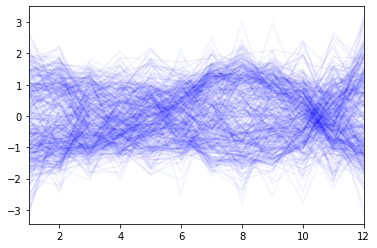

In [50]:
month_df_std.T.plot(color='blue', alpha=0.05, legend=False)

### クラスタリング

In [51]:
from sklearn.cluster import KMeans

ElbowMethodで最適なクラスター数をみる

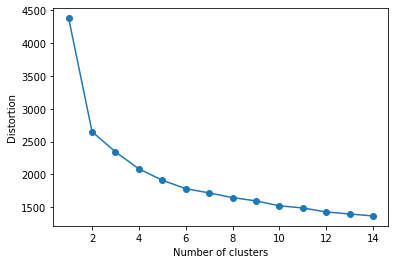

In [52]:
distortions = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(month_df_std)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

クラスターを2にしてやってみる

In [53]:
km = KMeans(n_clusters=2, random_state=1234)

In [54]:
km.fit(month_df_std)
km.cluster_centers_

array([[ 0.74541174,  0.79808265,  0.37559694,  0.01851729, -0.22361844,
        -0.47633325, -0.57490551, -0.75942184, -0.72378355, -0.48992185,
         0.376643  ,  0.93373281],
       [-0.91260144, -0.81909277, -0.57232344, -0.21381646,  0.18601341,
         0.47157637,  0.80905346,  0.88680038,  0.8538263 ,  0.47035912,
        -0.44299767, -0.71679725]])

In [55]:
km.cluster_centers_.shape

(2, 12)

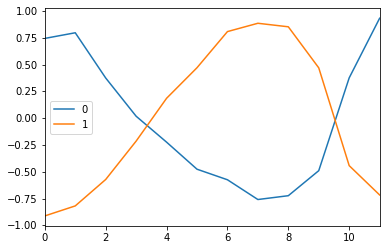

In [56]:
pd.DataFrame(km.cluster_centers_).T.plot()

In [57]:
cluster_labels_month = km.predict(month_df_std)
cluster_labels_month

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [58]:
np.bincount(cluster_labels_month)

array([170, 200])

In [59]:
month_df_std["cluster_labels_month"] =cluster_labels_month

In [60]:
month_df_std

,1,2,3,4,5,6,7,8,9,10,11,12,cluster_labels_month
0,1.623850,1.234336,0.179037,0.107806,-0.222166,-1.173303,-1.144637,-1.294866,-0.924835,-0.493320,0.877614,1.230483,0
1,0.783815,0.234474,-1.035776,-0.791090,-0.531071,-0.216600,1.671411,1.735273,0.904177,-0.601317,-1.056646,-1.096651,1
2,-1.073969,1.471202,1.291459,-0.282138,0.385550,0.289927,-0.671343,0.536535,0.081903,0.637191,-0.334144,-2.332175,1
3,-1.023626,-1.693750,-0.590745,-0.406154,0.877344,0.597003,0.263696,0.832066,1.166172,1.266302,0.327467,-1.615775,1
4,1.457764,1.724941,0.425174,-0.411489,-1.113991,-1.335525,-0.113355,-0.923032,-0.824653,-0.569783,0.497426,1.186521,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.640609,0.056378,0.690490,-1.250294,0.673874,-2.494161,1.154580,0.204111,-0.600775,0.496801,0.845569,-0.417182,0
366,-3.036810,-0.302258,-0.296752,0.256069,0.166997,0.421571,0.968283,0.806907,0.598645,0.575484,0.055927,-0.214063,1
367,0.248564,0.893264,1.106727,-0.772122,0.907576,1.371335,-0.434861,0.776585,-1.158236,-1.536839,0.052881,-1.454873,0
368,0.437689,0.727409,1.212997,0.477569,0.193527,-0.658573,-1.425002,-2.346960,-0.347366,0.033675,0.771763,0.923272,0


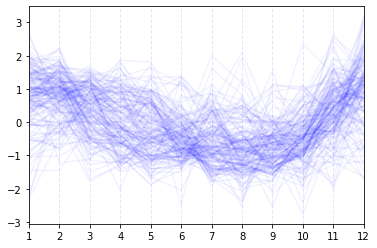

In [61]:
ax = month_df_std[month_df_std["cluster_labels_month"] == 0][list(range(1, 13))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(1, 13)))
ax.grid(which="major", axis="x", color="blue",alpha=0.1, linestyle="--", linewidth=1)

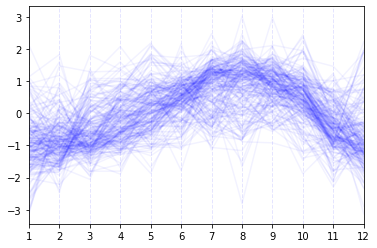

In [62]:
ax = month_df_std[month_df_std["cluster_labels_month"] == 1][list(range(1, 13))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(1, 13)))
ax.grid(which="major", axis="x", color="blue",alpha=0.1, linestyle="--", linewidth=1)

In [63]:
agg_df = month_df.copy()

In [64]:
agg_df["cluster_labels_month"] = cluster_labels_month

In [65]:
agg_pt = agg_df.groupby(["cluster_labels_month"]).aggregate({"customer_id": "nunique"})

In [66]:
agg_pt

,customer_id
cluster_labels_month,
0,170
1,200


## 月別でのクラスタリング
- クラスター0：グラフから冬によく電力を使う顧客, 顧客数170
- クラスター1：グラフから夏によく電力を使う顧客, 顧客数200

# 2.週ごとでpivot

In [67]:
week_df = pd.pivot_table(data, columns="week",index="customer_id", values="power_usage", aggfunc=np.mean).reset_index()

In [68]:
week_df 

week,customer_id,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,MT_001,170.709684,165.964020,145.339142,142.442121,167.854354,176.164096,177.864509
1,MT_002,242.766235,242.073805,243.018132,244.567125,245.109102,241.906253,243.988030
2,MT_003,267.743768,235.302635,191.862149,193.254472,173.970795,173.761946,206.137403
3,MT_004,398.704431,420.238235,319.946874,371.206939,418.551471,428.466196,432.141465
4,MT_005,455.463278,447.403748,451.257427,424.235851,460.276931,463.263465,459.819374
...,...,...,...,...,...,...,...,...
365,MT_366,424.400234,431.698793,456.187079,492.892080,443.449461,469.597887,430.487872
366,MT_367,553.328078,506.223921,516.364874,430.975594,535.172807,543.817972,540.893755
367,MT_368,249.309051,253.273177,490.291244,502.506849,251.956760,239.087368,248.754449
368,MT_369,646.516884,641.725551,676.563381,627.241269,635.791095,644.470889,647.419510


In [69]:
week_df.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], axis=1)

week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,165.964020,176.164096,177.864509,167.854354,170.709684,145.339142,142.442121
1,242.073805,241.906253,243.988030,245.109102,242.766235,243.018132,244.567125
2,235.302635,173.761946,206.137403,173.970795,267.743768,191.862149,193.254472
3,420.238235,428.466196,432.141465,418.551471,398.704431,319.946874,371.206939
4,447.403748,463.263465,459.819374,460.276931,455.463278,451.257427,424.235851
...,...,...,...,...,...,...,...
365,431.698793,469.597887,430.487872,443.449461,424.400234,456.187079,492.892080
366,506.223921,543.817972,540.893755,535.172807,553.328078,516.364874,430.975594
367,253.273177,239.087368,248.754449,251.956760,249.309051,490.291244,502.506849
368,641.725551,644.470889,647.419510,635.791095,646.516884,676.563381,627.241269


In [70]:
week_df.shape

(370, 8)

週の列を抽出する

In [71]:
target_cols = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_df2 = week_df[target_cols]
week_df2

week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,165.964020,176.164096,177.864509,167.854354,170.709684,145.339142,142.442121
1,242.073805,241.906253,243.988030,245.109102,242.766235,243.018132,244.567125
2,235.302635,173.761946,206.137403,173.970795,267.743768,191.862149,193.254472
3,420.238235,428.466196,432.141465,418.551471,398.704431,319.946874,371.206939
4,447.403748,463.263465,459.819374,460.276931,455.463278,451.257427,424.235851
...,...,...,...,...,...,...,...
365,431.698793,469.597887,430.487872,443.449461,424.400234,456.187079,492.892080
366,506.223921,543.817972,540.893755,535.172807,553.328078,516.364874,430.975594
367,253.273177,239.087368,248.754449,251.956760,249.309051,490.291244,502.506849
368,641.725551,644.470889,647.419510,635.791095,646.516884,676.563381,627.241269


### 横軸に「時間」、縦軸に時間あたり消費電力量の平均の折れ線グラフ

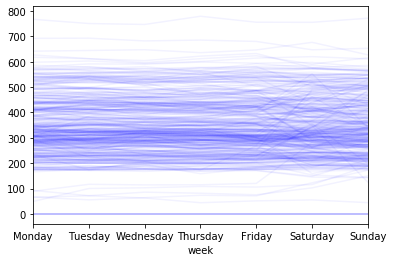

In [72]:
week_df2.T.plot(color='blue', alpha=0.05, legend=False)

## 平均0, 標準偏差1で標準化

### StandardScalerで平均0、標準偏差1で標準化する

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
week_df2_std = scaler.fit_transform(week_df2.T)
week_df2_std

array([[ 0.16699516, -1.11376328,  0.92003393, ..., -0.58895923,
        -0.27807694, -0.74324319],
       [ 0.9407381 , -1.26033856, -1.01251167, ..., -0.71547505,
        -0.08480536, -0.78897398],
       [ 1.06972558,  0.56081835,  0.00416604, ..., -0.6292594 ,
         0.12277738,  0.13848281],
       ...,
       [ 0.52698502, -0.50801851,  1.93877403, ..., -0.6243132 ,
         0.05923261, -0.69197888],
       [-1.3975376 , -0.28765704, -0.44411591, ...,  1.52488098,
         2.17450416,  0.03367103],
       [-1.61729572,  1.06741645, -0.40039316, ...,  1.63382558,
        -1.29776953,  2.2949823 ]])

In [76]:
week_df2.T

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
week,,,,,,,,,,,,,,,,,,,,,
Monday,165.964020,242.073805,235.302635,420.238235,447.403748,174.763908,379.100172,225.349381,437.828638,458.322477,...,378.316467,4.732404e-08,417.898771,440.295382,354.138940,431.698793,506.223921,253.273177,641.725551,174.543313
Tuesday,176.164096,241.906253,173.761946,428.466196,463.263465,173.612303,372.163126,233.494453,449.166639,445.903295,...,382.124244,4.778301e-08,410.786528,441.204108,371.182429,469.597887,543.817972,239.087368,644.470889,173.780882
Wednesday,177.864509,243.988030,206.137403,432.141465,459.819374,176.202409,362.040523,226.787609,449.829298,454.572851,...,372.584082,4.731942e-08,414.193108,441.886435,380.087185,430.487872,540.893755,248.754449,647.419510,189.243583
Thursday,167.854354,245.109102,173.970795,418.551471,460.276931,170.028713,375.371878,226.185709,446.680843,453.439740,...,387.049046,4.775913e-08,414.637814,431.637893,365.045235,443.449461,535.172807,251.956760,635.791095,182.884442
Friday,170.709684,242.766235,267.743768,398.704431,455.463278,175.186250,374.922544,226.747415,454.333367,466.986404,...,385.261340,4.832508e-08,418.952795,388.829400,381.205183,424.400234,553.328078,249.309051,646.516884,175.397999
Saturday,145.339142,243.018132,191.862149,319.946874,451.257427,176.344532,420.516807,230.453574,403.767707,405.465691,...,353.801949,4.947540e-08,434.678111,409.675481,364.131732,456.187079,516.364874,490.291244,676.563381,187.496145
Sunday,142.442121,244.567125,193.254472,371.206939,424.235851,177.897732,406.905430,216.830484,386.294995,382.498449,...,340.338146,4.962708e-08,429.834469,423.362835,348.057304,492.892080,430.975594,502.506849,627.241269,225.197072


In [77]:
week_df_std = pd.DataFrame(week_df2_std).T
week_df_std.columns =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
week_df_std.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.166995,0.940738,1.069726,0.310389,0.526985,-1.397538,-1.617296
1,-1.113763,-1.260339,0.560818,1.541543,-0.508019,-0.287657,1.067416
2,0.920034,-1.012512,0.004166,-1.005953,1.938774,-0.444116,-0.400393
3,0.581323,0.801002,0.899128,0.536288,0.006390,-2.096363,-0.727767
4,-0.346992,0.941648,0.661807,0.698985,0.307864,-0.033872,-2.229439


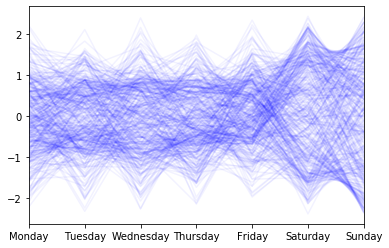

In [78]:
week_df_std.T.plot(color='blue', alpha=0.05, legend=False)

## クラスタリング

In [79]:
from sklearn.cluster import KMeans

ElbowMethodで最適なクラスター数をみてみる

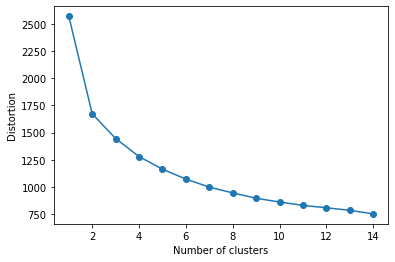

In [80]:
distortions = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(week_df_std)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

クラスター数を2としてやってみる

In [83]:
km = KMeans(n_clusters=2, random_state=1234)

In [84]:
km.fit(week_df_std)
km.cluster_centers_

array([[ 0.41031162,  0.48074415,  0.51635519,  0.3464999 ,  0.15004071,
        -0.91644428, -0.98750728],
       [-0.45737234, -0.42550431, -0.49155759, -0.40784684,  0.04516263,
         0.97294043,  0.76417801]])

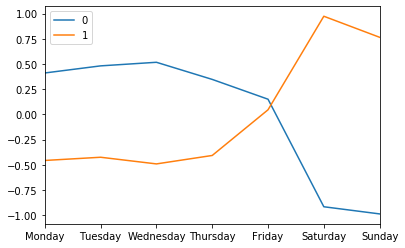

In [85]:
pd.DataFrame(km.cluster_centers_, columns=target_cols).T.plot()

In [86]:
target_cols

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [87]:
pd.DataFrame(km.cluster_centers_)

,0,1,2,3,4,5,6
0,0.410312,0.480744,0.516355,0.346500,0.150041,-0.916444,-0.987507
1,-0.457372,-0.425504,-0.491558,-0.407847,0.045163,0.972940,0.764178


In [88]:
km.cluster_centers_

array([[ 0.41031162,  0.48074415,  0.51635519,  0.3464999 ,  0.15004071,
        -0.91644428, -0.98750728],
       [-0.45737234, -0.42550431, -0.49155759, -0.40784684,  0.04516263,
         0.97294043,  0.76417801]])

In [89]:
km.cluster_centers_.shape

(2, 7)

In [90]:
cluster_labels_week = km.predict(week_df_std)
cluster_labels_week

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

In [91]:
np.bincount(cluster_labels_week)

array([166, 204])

In [92]:
week_df_std["cluster_labels_week"] = cluster_labels_week

In [93]:
week_df_std

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,cluster_labels_week
0,0.166995,0.940738,1.069726,0.310389,0.526985,-1.397538,-1.617296,0
1,-1.113763,-1.260339,0.560818,1.541543,-0.508019,-0.287657,1.067416,1
2,0.920034,-1.012512,0.004166,-1.005953,1.938774,-0.444116,-0.400393,0
3,0.581323,0.801002,0.899128,0.536288,0.006390,-2.096363,-0.727767,0
4,-0.346992,0.941648,0.661807,0.698985,0.307864,-0.033872,-2.229439,0
...,...,...,...,...,...,...,...,...
365,-0.790626,0.863254,-0.843470,-0.277838,-1.109128,0.278019,1.879790,1
366,-0.307683,0.665395,0.589705,0.441625,0.911553,-0.045196,-2.255399,0
367,-0.588959,-0.715475,-0.629259,-0.600700,-0.624313,1.524881,1.633826,1
368,-0.278077,-0.084805,0.122777,-0.695862,0.059233,2.174504,-1.297770,1


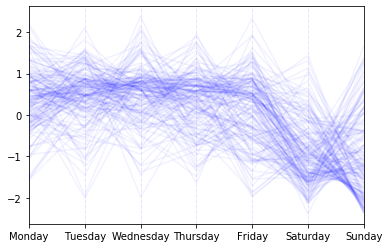

In [94]:
ax = week_df_std[week_df_std["cluster_labels_week"] == 0][week_of_day].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 7)))
ax.grid(which="major", axis="x", color="blue",alpha=0.1, linestyle="--", linewidth=1)

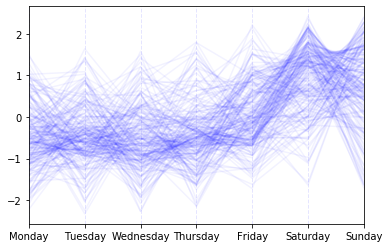

In [95]:
ax = week_df_std[week_df_std["cluster_labels_week"] == 1][week_of_day].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 7)))
ax.grid(which="major", axis="x", color="blue",alpha=0.1, linestyle="--", linewidth=1)

In [96]:
agg_df = month_df.copy()

In [97]:
agg_df["cluster_labels_week"] = cluster_labels_week

In [98]:
agg_pt = agg_df.groupby(["cluster_labels_week"]).aggregate({"customer_id": "nunique"})

In [99]:
agg_pt

,customer_id
cluster_labels_week,
0,166
1,204


## 曜日でクラスタリング
- クラスター0：平日に多くの電力を使う顧客, 顧客数166
- クラスター1：休日に多くの電力を使う顧客, 顧客数204

# 3.時間ごとにpivot

In [100]:
hour_df = pd.pivot_table(data, columns="hour",index="customer_id", values="power_usage", aggfunc=np.mean).reset_index()

In [101]:
hour_df 

hour,customer_id,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,MT_001,193.922537,187.987623,185.091440,186.426535,187.779014,189.934636,197.402823,178.329045,143.359294,...,129.048745,165.669981,170.474932,143.074195,142.222377,156.651137,172.262012,174.608859,192.903831,192.910785
1,MT_002,229.655683,188.368830,189.802997,185.506343,184.658703,187.813480,205.951012,253.397377,281.287632,...,261.172275,258.761862,249.365732,247.265145,259.991426,273.109375,285.097138,264.874608,254.067694,256.121514
2,MT_003,172.809826,159.480142,153.767421,271.830332,172.809826,197.564952,172.809826,172.809826,185.187389,...,271.830332,172.809826,172.809826,172.809826,209.942516,172.809826,209.704486,172.809826,172.809826,172.809826
3,MT_004,130.957234,183.572781,444.665330,565.636485,662.952445,700.116940,673.554962,633.773249,686.724580,...,491.799198,510.020047,465.172625,431.147121,316.534135,168.459739,171.716784,163.615659,152.403386,138.886847
4,MT_005,532.552623,474.968259,446.130972,450.357501,430.294019,427.627798,402.198463,359.064484,407.206816,...,356.929502,414.279987,426.124290,447.093218,503.043769,468.035750,476.140327,559.272302,642.295690,619.140996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MT_366,450.255136,430.255617,414.881730,451.663634,518.090368,495.251729,487.320150,472.045657,532.731630,...,498.609296,450.058915,425.345271,383.270197,384.311261,357.854389,384.486963,385.519690,379.677293,373.890042
366,MT_367,631.988021,609.302873,572.511191,523.282572,473.356730,461.104285,456.816001,446.401169,376.460967,...,554.942139,560.418969,545.586852,552.570099,536.879262,576.916449,520.028528,441.575595,526.788844,664.096889
367,MT_368,269.693919,264.785281,328.177099,531.438242,656.445674,609.403801,571.381526,243.680106,217.179317,...,228.147369,227.459464,237.395797,292.458938,298.407940,306.143756,300.178425,289.412720,276.043406,277.181284
368,MT_369,703.514241,651.209376,655.216647,673.398546,629.823344,650.053228,632.829410,615.684731,672.727695,...,640.113345,596.624473,568.542341,555.272705,571.311891,616.703531,632.034084,653.297071,680.936408,689.550054


In [102]:
hour_df.shape

(370, 25)

0時~23時の列を抽出する

In [103]:
target_cols = list(range(0,24))
hour_df2 = hour_df[target_cols]
hour_df2

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,193.922537,187.987623,185.091440,186.426535,187.779014,189.934636,197.402823,178.329045,143.359294,132.615952,...,129.048745,165.669981,170.474932,143.074195,142.222377,156.651137,172.262012,174.608859,192.903831,192.910785
1,229.655683,188.368830,189.802997,185.506343,184.658703,187.813480,205.951012,253.397377,281.287632,251.479959,...,261.172275,258.761862,249.365732,247.265145,259.991426,273.109375,285.097138,264.874608,254.067694,256.121514
2,172.809826,159.480142,153.767421,271.830332,172.809826,197.564952,172.809826,172.809826,185.187389,284.207895,...,271.830332,172.809826,172.809826,172.809826,209.942516,172.809826,209.704486,172.809826,172.809826,172.809826
3,130.957234,183.572781,444.665330,565.636485,662.952445,700.116940,673.554962,633.773249,686.724580,562.189553,...,491.799198,510.020047,465.172625,431.147121,316.534135,168.459739,171.716784,163.615659,152.403386,138.886847
4,532.552623,474.968259,446.130972,450.357501,430.294019,427.627798,402.198463,359.064484,407.206816,362.151687,...,356.929502,414.279987,426.124290,447.093218,503.043769,468.035750,476.140327,559.272302,642.295690,619.140996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,450.255136,430.255617,414.881730,451.663634,518.090368,495.251729,487.320150,472.045657,532.731630,465.080116,...,498.609296,450.058915,425.345271,383.270197,384.311261,357.854389,384.486963,385.519690,379.677293,373.890042
366,631.988021,609.302873,572.511191,523.282572,473.356730,461.104285,456.816001,446.401169,376.460967,438.658977,...,554.942139,560.418969,545.586852,552.570099,536.879262,576.916449,520.028528,441.575595,526.788844,664.096889
367,269.693919,264.785281,328.177099,531.438242,656.445674,609.403801,571.381526,243.680106,217.179317,219.894344,...,228.147369,227.459464,237.395797,292.458938,298.407940,306.143756,300.178425,289.412720,276.043406,277.181284
368,703.514241,651.209376,655.216647,673.398546,629.823344,650.053228,632.829410,615.684731,672.727695,706.873478,...,640.113345,596.624473,568.542341,555.272705,571.311891,616.703531,632.034084,653.297071,680.936408,689.550054


### 横軸に「時間」、縦軸に時間あたり消費電力量の平均の折れ線グラフ

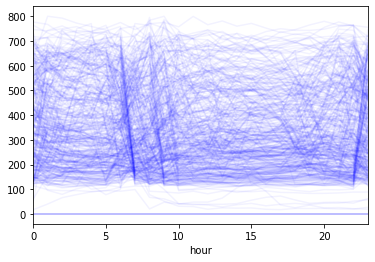

In [104]:
hour_df2.T.plot(color='blue', alpha=0.05, legend=False)

## 平均0, 標準偏差1で標準化

### StandardScalerで平均0、標準偏差1で標準化する

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
hour_df2_std = scaler.fit_transform(hour_df2.T)
hour_df2_std

array([[ 1.16665375, -0.41826504, -0.61007854, ..., -0.38968114,
         1.29648719,  0.96892759],
       [ 0.93678385, -1.67940665, -0.85505779, ..., -0.42838302,
         0.12394778, -0.34362869],
       [ 0.82460948, -1.63559882, -0.9600489 , ...,  0.07142624,
         0.21378041, -0.92574007],
       ...,
       [ 0.41860024,  0.6575266 , -0.61007854, ..., -0.23420935,
         0.1707485 ,  1.03208881],
       [ 1.12719747,  0.32742035, -0.61007854, ..., -0.33961896,
         0.79035073,  0.12893405],
       [ 1.12746679,  0.39015601, -0.61007854, ..., -0.33064743,
         0.98344634,  0.12784797]])

In [108]:
hour_df2.T

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
hour,,,,,,,,,,,,,,,,,,,,,
0,193.922537,229.655683,172.809826,130.957234,532.552623,167.582355,461.023564,230.308381,418.066865,481.299160,...,123.234950,3.200548e-08,134.892781,150.392279,357.014520,450.255136,631.988021,269.693919,703.514241,192.886486
1,187.987623,188.368830,159.480142,183.572781,474.968259,125.533268,414.025415,206.743231,395.037839,442.733834,...,440.051314,1.911507e-08,690.447570,233.549191,294.125842,430.255617,609.302873,264.785281,651.209376,184.832581
2,185.091440,189.802997,153.767421,444.665330,446.130972,108.259948,383.110960,185.268207,367.343615,423.941670,...,474.403019,1.661178e-08,646.412231,345.790785,299.498134,414.881730,572.511191,328.177099,655.216647,181.260718
3,186.426535,185.506343,271.830332,565.636485,450.357501,111.803653,379.875636,192.908076,370.840119,402.695537,...,575.827442,1.469479e-08,621.804751,515.031133,295.758604,451.663634,523.282572,531.438242,673.398546,176.181562
4,187.779014,184.658703,172.809826,662.952445,430.294019,119.568656,376.048692,197.343296,368.952965,399.655325,...,564.734387,1.215562e-08,579.075198,673.935243,290.196639,518.090368,473.356730,656.445674,629.823344,186.888560
5,189.934636,187.813480,197.564952,700.116940,427.627798,117.654110,368.213603,197.370970,357.917425,401.584917,...,465.376395,1.178575e-08,605.599676,674.489415,286.367452,495.251729,461.104285,609.403801,650.053228,187.923288
6,197.402823,205.951012,172.809826,673.554962,402.198463,256.311155,336.228966,181.513768,319.283456,370.192959,...,330.598105,1.190986e-08,750.822958,391.195517,286.663928,487.320150,456.816001,571.381526,632.829410,189.728693
7,178.329045,253.397377,172.809826,633.773249,359.064484,187.296967,299.698770,188.653660,283.120989,298.588010,...,287.627820,1.133890e-08,759.802902,116.039851,277.694487,472.045657,446.401169,243.680106,615.684731,191.322029
8,143.359294,281.287632,185.187389,686.724580,407.206816,174.389269,325.855487,199.621789,315.384615,330.422743,...,222.072492,1.260055e-08,704.470112,132.204234,325.409441,532.731630,376.460967,217.179317,672.727695,181.317586


In [109]:
hour_df_std = pd.DataFrame(hour_df2_std).T
hour_df_std.columns = list(range(0, 24))
hour_df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.166654,0.936784,0.824609,0.876320,0.928704,1.012195,1.301452,0.562690,-0.791752,-1.207861,...,-1.346025,0.072381,0.258486,-0.802794,-0.835787,-0.276935,0.327703,0.418600,1.127197,1.127467
1,-0.418265,-1.679407,-1.635599,-1.766844,-1.792736,-1.696370,-1.142344,0.306945,1.158876,0.248376,...,0.544436,0.470808,0.183795,0.119631,0.508366,0.909064,1.275241,0.657527,0.327420,0.390156
2,-0.610079,-0.855058,-0.960049,1.209767,-0.610079,-0.155117,-0.610079,-0.610079,-0.382598,1.437248,...,1.209767,-0.610079,-0.610079,-0.610079,0.072364,-0.610079,0.067989,-0.610079,-0.610079,-0.610079
3,-1.382680,-1.110817,0.238238,0.863292,1.366119,1.558147,1.420902,1.215352,1.488949,0.845481,...,0.481777,0.575924,0.344199,0.168390,-0.423811,-1.188906,-1.172077,-1.213935,-1.271868,-1.341708
4,1.109091,0.319214,-0.076343,-0.018368,-0.293577,-0.330149,-0.678960,-1.270623,-0.610261,-1.228276,...,-1.299908,-0.513239,-0.350772,-0.063144,0.704322,0.224122,0.335291,1.475602,2.614423,2.296813


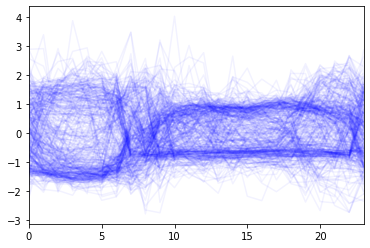

In [110]:
hour_df_std.T.plot(color='blue', alpha=0.05, legend=False)

## クラスタリング

In [111]:
from sklearn.cluster import KMeans

ElbowMethodで最適なクラスター数をみてみる

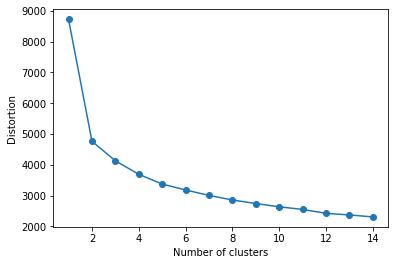

In [113]:
distortions = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(hour_df_std)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [114]:
km = KMeans(n_clusters=2, random_state=1234)

In [115]:
km.fit(hour_df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

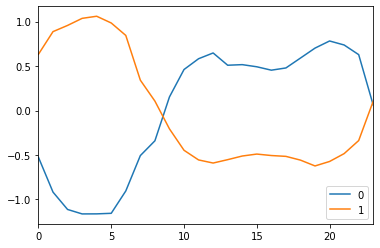

In [116]:
pd.DataFrame(km.cluster_centers_).T.plot()

In [117]:
km.cluster_centers_.shape

(2, 24)

In [118]:
cluster_labels_hour = km.predict(hour_df_std)
np.bincount(cluster_labels_hour)

array([204, 166])

In [119]:
hour_df_std["cluster_labels_hour"] = cluster_labels_hour

In [120]:
hour_df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster_labels_hour
0,1.166654,0.936784,0.824609,0.876320,0.928704,1.012195,1.301452,0.562690,-0.791752,-1.207861,...,0.072381,0.258486,-0.802794,-0.835787,-0.276935,0.327703,0.418600,1.127197,1.127467,1
1,-0.418265,-1.679407,-1.635599,-1.766844,-1.792736,-1.696370,-1.142344,0.306945,1.158876,0.248376,...,0.470808,0.183795,0.119631,0.508366,0.909064,1.275241,0.657527,0.327420,0.390156,0
2,-0.610079,-0.855058,-0.960049,1.209767,-0.610079,-0.155117,-0.610079,-0.610079,-0.382598,1.437248,...,-0.610079,-0.610079,-0.610079,0.072364,-0.610079,0.067989,-0.610079,-0.610079,-0.610079,0
3,-1.382680,-1.110817,0.238238,0.863292,1.366119,1.558147,1.420902,1.215352,1.488949,0.845481,...,0.575924,0.344199,0.168390,-0.423811,-1.188906,-1.172077,-1.213935,-1.271868,-1.341708,1
4,1.109091,0.319214,-0.076343,-0.018368,-0.293577,-0.330149,-0.678960,-1.270623,-0.610261,-1.228276,...,-0.513239,-0.350772,-0.063144,0.704322,0.224122,0.335291,1.475602,2.614423,2.296813,0


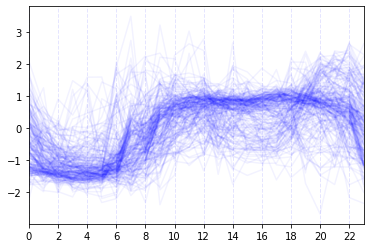

In [121]:
ax = hour_df_std[hour_df_std["cluster_labels_hour"] == 0][list(
    range(0, 24))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 24, 2)))
ax.grid(which="major", axis="x", color="blue",
        alpha=0.1, linestyle="--", linewidth=1)

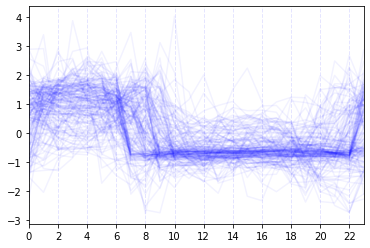

In [122]:
ax = hour_df_std[hour_df_std["cluster_labels_hour"] == 1][list(
    range(0, 24))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 24, 2)))
ax.grid(which="major", axis="x", color="blue",
        alpha=0.1, linestyle="--", linewidth=1)

In [123]:
agg_df = hour_df.copy()

In [124]:
agg_df["cluster_labels_hour"] = cluster_labels_hour

In [125]:
agg_pt = agg_df.groupby(["cluster_labels_hour"]).aggregate(
    {"customer_id": "nunique"})

In [126]:
agg_pt

,customer_id
cluster_labels_hour,
0,204
1,166


## 時間別でクラスタリング
- クラスター0：グラフからは9時〜22時の日中から夜までよく電力を使う顧客, 顧客数204
- クラスター1：グラフからは22時〜7時の夜によく電力を使う顧客, 顧客数166

# 結合する

In [127]:
print(cluster_labels_month.shape)
print(cluster_labels_hour.shape)
print(cluster_labels_week.shape)

(370,)
(370,)
(370,)


In [128]:
total_power_usage_by_company['cluster_labels_month'] =cluster_labels_month
total_power_usage_by_company['cluster_labels_week'] =cluster_labels_week
total_power_usage_by_company['cluster_labels_hour'] =cluster_labels_hour
total_power_usage_by_company

,customer_id,power_usage,cluster_labels_month,cluster_labels_week,cluster_labels_hour
0,MT_001,1.434898e+06,0,0,1
1,MT_002,2.131735e+06,1,1,0
2,MT_003,1.804605e+06,1,0,0
3,MT_004,3.491362e+06,1,0,1
4,MT_005,3.956862e+06,0,0,0
...,...,...,...,...,...
365,MT_366,3.939926e+06,0,1,1
366,MT_367,4.539199e+06,1,0,1
367,MT_368,2.795473e+06,0,1,1
368,MT_369,5.656159e+06,0,1,1


In [130]:
total_power_usage_by_company_groupby=total_power_usage_by_company.groupby(['cluster_labels_month','cluster_labels_week',
                                                                  'cluster_labels_hour']).aggregate({'power_usage':np.sum,"customer_id":"nunique"})

In [131]:
total_power_usage_by_company_groupby['power_usage']=total_power_usage_by_company_groupby['power_usage']/1000000
total_power_usage_by_company_groupby

power_usage  \
cluster_labels_month cluster_labels_week cluster_labels_hour                
0                    0                   0                     144.726827   
                                         1                     119.689239   
                     1                   0                     105.664914   
                                         1                     125.654069   
1                    0                   0                     136.314605   
                                         1                     115.744293   
                     1                   0                     232.782897   
                                         1                     127.755013   

                                                              customer_id  
cluster_labels_month cluster_labels_week cluster_labels_hour               
0                    0                   0                             46  
                                         1                             39  
                     1                   0                             38  
                                         1                             47  
1                    0                   0                             44  
                                         1                             37  
                     1                   0                             76  
                                         1                             43

- 冬によく使い、平日によく使い、9時から22時によく使う顧客:46
- 冬によく使い、平日によく使い、22時〜7時によく使う顧客:39
- 冬によく使い、休日によく使い、9時から22時によく使う顧客:38
- 冬によく使い、休日によく使い、22時〜7時によく使う顧客:47
- 夏によく使い、平日によく使い、9時から22時によく使う顧客:44
- 夏によく使い、平日によく使い、22時〜7時によく使う顧客:37
- 夏によく使い、休日によく使い、9時から22時によく使う顧客:76
- 夏によく使い、休日によく使い、22時〜7時によく使う顧客:43